# 深度学习框架分享-基础

## 1. Caffe，TensorFlow， Mxnet框架基础





## 1.1 无关的话

机器学习这个领域，从业者可以分成三个不同的群体：

- **学术研究者**  
  站在理论研究的边界, 推动领域向前发展，能够为其他业内人士提供更优秀的模型和新的idea  
  

- **算法改进者**  
  根据现有的思想，探索问题内在, 对算法进行改进  
  

- **工业实现者**$ \surd $  
  从论文复现优秀成果，或使用其他人复现的成果，并尝试在工业上应用


### 1.1.1 作为一个工业实现者的基本需求

- 了解深度学习框架的基本知识  
- 能够根据业务需求，从现有模型拿到需要的数据  
- 针对任务目标，使用迁移学习达成目的  

### 1.1.2 ML/DL最简要素

- **数据**  
  <img src="./DLFrameWork/data.png" width = "600" align=center />  

- **模型**  
  根据任务的不同，往往需要选择特定的模型来达到期望的效果，例如使用CNN处理具有局部关联性的数据类型、使用RNN处理具有时序特性的数据  
  
  
- **损失函数**  
  在构建模型过程中，需要对比输出和真实值之间的误差。损失函数可以衡量输出结果对比真实数据的好坏，作为评估模型效果的一个标准  
    
    
- **优化算法**  
  当模型结构和损失函数都已经定义好，需要通过某种算法来调整模型参数，从而使模型输出逼近真实数据  





## 1.2 如何最快的上手这三种框架

### 1.2.1 安装

  这几种框架的详细安装方法可以参考官方网址：[Caffe](http://caffe.berkeleyvision.org/), [Tensorflow](https://www.tensorflow.org/), [Mxnet](http://mxnet.incubator.apache.org/)  
  
### 1.2.2 一些概念
- 命令式和符号式  
  <img src="./DLFrameWork/framework.jpg" width = "600" align=center />  
  
|           |  命令式编程  | 符号式编程 |
| -------------  |:-------------| :-----    |
|如何执行a = b+1 |需要b已经被赋值。立即执行加法，将结果保存在a中。                                                 | 返回对应的计算图(computation graph)，我们可以之后对b进行赋值，然后再执行加法运算 |
| 优点        |语义上容易理解，灵活，可以精确控制行为。通常可以无缝的和主语言交互，方便的利用主语言的各类算法，工具包，bug和性能调试器。|  在真正开始计算的时候已经拿到了整个计算图，所以我们可以做一系列优化来提升性能。实现辅助函数也容易，例如对任何计算图都提供forward和backward函数，对计算图进行可视化，将图保存到硬盘和从硬盘读取。                                                          |
| 缺点        | 实现统一的辅助函数和提供整体优化都很困难     |   很多主语言的特性都用不上。某些在主语言中实现简单，但在这里却经常麻烦，例如if-else语句 。debug也不容易，例如监视一个复杂的计算图中的某个节点的中间结果并不简单。                                 |

- 变量


|  框架       | Caffe    |  Mxnet   | Tensorflow |
| :------------- |:---------:| :-------: |:---------: |
|数据类型      |  Blob    |  Ndarray  |  Tensor   |


- 模型和权值  
三种框架都有自己定义的模型文件和权值文件，分别用来保存模型的结构和权值。  

|  框架       |   Caffe     |  Mxnet        | Tensorflow |
| :------------- | :---------:   | :-----------:   |:---------: |
| 模型文件     |  \*.prototxt  |  \*-symbol.json  | \*.meta   |
| 权值文件     | \*.caffemodel  |  \*-iter.params  | \*.ckpt   |

### 1.2.3 文本组织方式

按照Caffe，Mxnet，TensorFlow的顺序，每个框架分别介绍基本数据类型，网络结构定义，训练，模型序列化，指定层信息获取。




## 2. 正文

## 2.1 Caffe

### 2.1.1 blob, layer, net

- blob  
  blob是caffe中数据的基本存在形式，形状为 (n, c, h, w)  
  
  
- layer  
  层表示一些计算的集合，这些计算包括卷积滤波器、池化、内积、激活函数等等。layer的实现中，定义了initialize，forward，backward这些基本接口。
  
  
- net
  由各种层组成的有向无环图，网络定义在`train.prototxt`文件中，写法如下：  
  
``` json
    name: "LogReg"
    layer {
      name: "mnist"
      type: "Data"
      top: "data"
      top: "label"
      data_param {
        source: "input_leveldb"
        batch_size: 64
      }
    }
    layer {
      name: "ip"
      type: "InnerProduct"
      bottom: "data"
      top: "ip"
      inner_product_param {
        num_output: 2
      }
    }
    layer {
      name: "loss"
      type: "SoftmaxWithLoss"
      bottom: "ip"
      bottom: "label"
      top: "loss"
    }
```


### 2.1.2 加载网络
加载网络时，如果不指定LOGGER，默认会在输出中打印网络加载信息，可以用`caffe.init_log()`使信息输出至文件中。


In [1]:
import caffe

net_proto = "./DLFrameWork/caffe-resnet-18/deploy.prototxt"
net_weight = "./DLFrameWork/caffe-resnet-18/resnet-18.caffemodel"
net = caffe.Net(net_proto, weights=net_weight, phase=caffe.TEST)


** 查看blob信息 **

In [2]:
for layer_name, blob in net.blobs.items():
    print (layer_name + '\t' + str(blob.data.shape))  

data	(1, 3, 224, 224)
conv1	(1, 64, 112, 112)
pool1	(1, 64, 56, 56)
pool1_pool1_0_split_0	(1, 64, 56, 56)
pool1_pool1_0_split_1	(1, 64, 56, 56)
res2a_branch1	(1, 64, 56, 56)
res2a_branch2a	(1, 64, 56, 56)
res2a_branch2b	(1, 64, 56, 56)
res2a	(1, 64, 56, 56)
res2a_res2a_relu_0_split_0	(1, 64, 56, 56)
res2a_res2a_relu_0_split_1	(1, 64, 56, 56)
res2b_branch2a	(1, 64, 56, 56)
res2b_branch2b	(1, 64, 56, 56)
res2b	(1, 64, 56, 56)
res2b_res2b_relu_0_split_0	(1, 64, 56, 56)
res2b_res2b_relu_0_split_1	(1, 64, 56, 56)
res3a_branch1	(1, 128, 28, 28)
res3a_branch2a	(1, 128, 28, 28)
res3a_branch2b	(1, 128, 28, 28)
res3a	(1, 128, 28, 28)
res3a_res3a_relu_0_split_0	(1, 128, 28, 28)
res3a_res3a_relu_0_split_1	(1, 128, 28, 28)
res3b_branch2a	(1, 128, 28, 28)
res3b_branch2b	(1, 128, 28, 28)
res3b	(1, 128, 28, 28)
res3b_res3b_relu_0_split_0	(1, 128, 28, 28)
res3b_res3b_relu_0_split_1	(1, 128, 28, 28)
res4a_branch1	(1, 256, 14, 14)
res4a_branch2a	(1, 256, 14, 14)
res4a_branch2b	(1, 256, 14, 14)
res4a	(1, 

** 查看参数信息 **

In [3]:
for layer_name, param in net.params.items():
    print(layer_name + '\t' + str(param[0].data.shape))

conv1	(64, 3, 7, 7)
bn_conv1	(64,)
scale_conv1	(64,)
res2a_branch1	(64, 64, 1, 1)
bn2a_branch1	(64,)
scale2a_branch1	(64,)
res2a_branch2a	(64, 64, 3, 3)
bn2a_branch2a	(64,)
scale2a_branch2a	(64,)
res2a_branch2b	(64, 64, 3, 3)
bn2a_branch2b	(64,)
scale2a_branch2b	(64,)
res2b_branch2a	(64, 64, 3, 3)
bn2b_branch2a	(64,)
scale2b_branch2a	(64,)
res2b_branch2b	(64, 64, 3, 3)
bn2b_branch2b	(64,)
scale2b_branch2b	(64,)
res3a_branch1	(128, 64, 1, 1)
bn3a_branch1	(128,)
scale3a_branch1	(128,)
res3a_branch2a	(128, 64, 3, 3)
bn3a_branch2a	(128,)
scale3a_branch2a	(128,)
res3a_branch2b	(128, 128, 3, 3)
bn3a_branch2b	(128,)
scale3a_branch2b	(128,)
res3b_branch2a	(128, 128, 3, 3)
bn3b_branch2a	(128,)
scale3b_branch2a	(128,)
res3b_branch2b	(128, 128, 3, 3)
bn3b_branch2b	(128,)
scale3b_branch2b	(128,)
res4a_branch1	(256, 128, 1, 1)
bn4a_branch1	(256,)
scale4a_branch1	(256,)
res4a_branch2a	(256, 128, 3, 3)
bn4a_branch2a	(256,)
scale4a_branch2a	(256,)
res4a_branch2b	(256, 256, 3, 3)
bn4a_branch2b	(256,)
s

### 2.1.3 图像输入和预处理

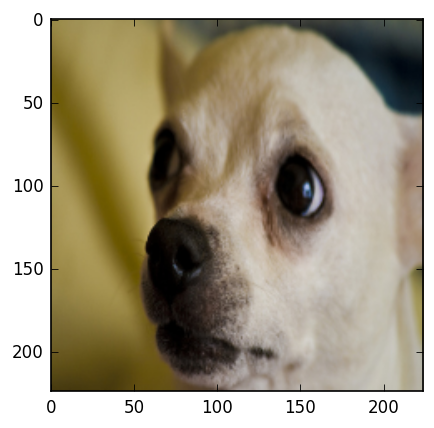

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import cv2

img = cv2.imread("./DLFrameWork/dog.jpg")
img = cv2.resize(img,(224,224))
img = img[:, :, (2,1,0)]
# img = cv2.cvtColor()
plt.imshow(img)

** 加载均值文件 **


In [5]:
def __get_mean_blob(mean_proto):
    mean_blob = caffe.proto.caffe_pb2.BlobProto()
    mean_blob.ParseFromString(open(mean_proto, 'rb').read())

    # 将均值blob转为numpy.array
    mean_npy = caffe.io.blobproto_to_array(mean_blob)
    mean = mean_npy.mean(2).mean(2)
    mean.shape = (3,)
    return mean
mean_array = __get_mean_blob('./DLFrameWork/caffe-resnet-18/mean_224.binaryproto')
mean_array

array([  97.79765409,   99.01582387,  105.57459526])

** 图像预处理 **

In [6]:
import numpy as np

def __process_img(img):
    in_ = np.float32(img)
    in_ -= mean_array
    in_ = in_.transpose((2, 0, 1))
    return in_
processed_img = __process_img(img)

### 2.1.4 使用网络进行预测

- 使用处理好的图像对网络中的数据层Blob赋值。  
- 默认情况下，使用`net.forward()`只会返回输出层的结果，如果需要其它层的信息，需要提供对应的参数列表`['fc1000','prob']`
- `net.forward()`返回的是一个字典，字典的key是layer名称，value是该层输出结果的列表

In [7]:
net.blobs['data'].reshape(1, 3, 224, 224)
net.blobs['data'].data[...] = processed_img
net.forward().keys()

dict_keys(['prob'])

In [8]:
net.forward(['fc1000','prob']).keys()

dict_keys(['prob', 'fc1000'])

In [9]:
# 倒数第二层的特征
feature = net.forward(['fc1000'])['fc1000'][0]
print(feature.shape)

(1000,)


In [10]:
img_probs = net.forward(['prob'])['prob'][0]
cls_id = img_probs.argmax()
img_prob = img_probs[cls_id]
print("class_id: {} with prob {}".format(cls_id, img_prob))

class_id: 242 with prob 0.13337442278862


### 2.1.5 训练
用的不多,这就不写了，一般用到caffe都是在用pretrained模型

## 2.2 Mxnet

### 2.2.1 ndarray和autograd
NDArray，是MXNet储存和变换数据的主要工具。NDArray和NumPy的多维数组非常类似。区别在于，NDArray为了实现更好的支持机器学习提供更多的功能，首先是CPU和GPU的异步计算，其次是自动求导。

** ndarray和numpy的相互转换**

In [11]:
import mxnet as mx
from mxnet import ndarray as nd
import numpy as np

example_x = np.ones((2,3))
example_y = nd.array(example_x, ctx=mx.gpu())  # numpy -> mxnet
example_z = example_y.asnumpy()  # mxnet -> numpy

print(type(example_y), example_y, '\n')
print(type(example_z), example_z)

<class 'mxnet.ndarray.ndarray.NDArray'> 
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @gpu(0)> 

<class 'numpy.ndarray'> [[ 1.  1.  1.]
 [ 1.  1.  1.]]


** autograd **  
使用autograd来自动求导，需要为计算导数申请空间，并记录要求导的函数。

In [12]:
import mxnet.ndarray as nd
import mxnet.autograd as ag

example_x = nd.array([[1, 2], [3, 4]],ctx=mx.gpu())
example_x.attach_grad()

with ag.record():
    example_y = example_x * 2
    example_z = example_y * example_x

example_z.backward()

print('x.grad: ', example_x.grad)
example_x.grad == 4 * example_x


x.grad:  
[[  4.   8.]
 [ 12.  16.]]
<NDArray 2x2 @gpu(0)>



[[ 1.  1.]
 [ 1.  1.]]
<NDArray 2x2 @gpu(0)>

### 2.2.2 网络模型构建

- **创建数据集**

In [13]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(shape=y.shape)

batch_size = 10
dataset = gluon.data.ArrayDataset(X, y)
data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)

for data, label in data_iter:
    print(data, label)
    break


[[-0.42496973 -0.47113317]
 [-0.04687112 -0.10978916]
 [ 1.59793377 -0.0243843 ]
 [-0.00167823  0.39700022]
 [ 1.06596541  0.3201088 ]
 [-0.34779251  1.09589124]
 [ 0.29536423  0.28475317]
 [-0.52709568 -0.08139905]
 [-0.61070508  0.85606372]
 [-0.40127027 -0.86884683]]
<NDArray 10x2 @cpu(0)> 
[ 4.93389177  4.46002197  7.48300648  2.83499575  5.21867704 -0.20821169
  3.82770133  3.41783428  0.07558576  6.36229944]
<NDArray 10 @cpu(0)>


- **定义模型**

损失函数 $  L = \frac{1}{2} \sum_i \vert {pred}_i - {label}_i \vert^2$

In [14]:
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Dense(1))

net.initialize()
square_loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

### 2.2.3 训练模型

In [15]:
epochs = 5
batch_size = 10
for e in range(epochs):
    total_loss = 0
    for data, label in data_iter:
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        total_loss += nd.sum(loss).asscalar()
    print("Epoch %d, average loss: %f" % (e, total_loss/num_examples))
    

Epoch 0, average loss: 0.881845
Epoch 1, average loss: 0.000047
Epoch 2, average loss: 0.000047
Epoch 3, average loss: 0.000047
Epoch 4, average loss: 0.000047


In [16]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 2.0004468  -3.40106297]]
 <NDArray 1x2 @cpu(0)>)

In [17]:
true_b, dense.bias.data()

(4.2, 
 [ 4.19937086]
 <NDArray 1 @cpu(0)>)

### 2.2.4 模型序列化
- **模型参数存储**

In [18]:
net.save_params('./models/simple-lr.params')

- **模型参数加载**

In [19]:
new_net = gluon.nn.Sequential()

with new_net.name_scope():
    new_net.add(gluon.nn.Dense(1))

# new_net.initialize()
new_net.load_params('./models/simple-lr.params', ctx=mx.cpu())

- **使用模型进行预测**

In [20]:
test_x = nd.array([[1., 1.],[2., 2.]])
print('forward result: ', new_net(test_x))
print('true label: ', true_w[0] * test_x[:, 0] + true_w[1] * test_x[:, 1] + true_b)

forward result:  
[[ 2.79875469]
 [ 1.39813852]]
<NDArray 2x1 @cpu(0)>
true label:  
[ 2.79999971  1.39999962]
<NDArray 2 @cpu(0)>


### 2.2.5 权值和特征输出

- **获取权值和偏置**  
上边的代码中已经展示了一种获取权值的方法，这里是另一种

In [21]:
new_net_params = new_net.collect_params()
for layer_name, param in new_net_params.items():
    print(layer_name, param.data())

sequential1_dense0_weight 
[[ 2.0004468  -3.40106297]]
<NDArray 1x2 @cpu(0)>
sequential1_dense0_bias 
[ 4.19937086]
<NDArray 1 @cpu(0)>


- **输出中间层特征**  
这里会用一个复杂的模型resnet18作为例子：

In [22]:
from mxnet.gluon.model_zoo import vision as models

resnet_18 = models.resnet18_v2()
resnet_18.load_params('./DLFrameWork/gluon-resnet-18/resnet18_v2.params', ctx=mx.gpu())


In [23]:
resnet_18.features

HybridSequential(
  (0): BatchNorm(fix_gamma=True, momentum=0.9, axis=1, eps=1e-05)
  (1): Conv2D(3 -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (2): BatchNorm(fix_gamma=False, momentum=0.9, axis=1, eps=1e-05)
  (3): Activation(relu)
  (4): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False)
  (5): HybridSequential(
    (0): BasicBlockV2(
      (conv2): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm(fix_gamma=False, momentum=0.9, axis=1, eps=1e-05)
      (conv1): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm(fix_gamma=False, momentum=0.9, axis=1, eps=1e-05)
    )
    (1): BasicBlockV2(
      (conv2): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm(fix_gamma=False, momentum=0.9, axis=1, eps=1e-05)
      (conv1): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [24]:
resnet_18.classifier

HybridSequential(
  (0): BatchNorm(fix_gamma=False, momentum=0.9, axis=1, eps=1e-05)
  (1): Activation(relu)
  (2): GlobalAvgPool2D(size=(1, 1), stride=(1, 1), padding=(0, 0), ceil_mode=True)
  (3): Flatten
  (4): Dense(512 -> 1000, linear)
)

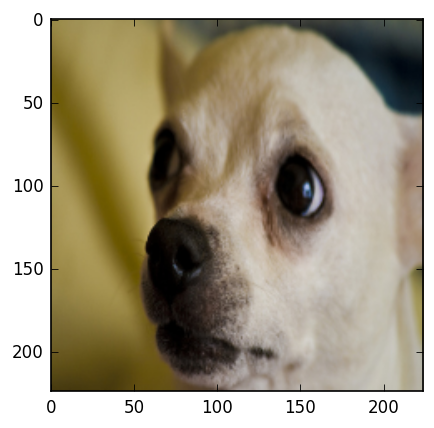

In [37]:
plt.imshow(img)

In [26]:

data = nd.array(img).astype('float32')
data = nd.transpose(data, (2, 0, 1)).expand_dims(axis=0)
out = resnet_18(data.as_in_context(mx.gpu()))
out = nd.SoftmaxActivation(out)
cls_id = int(nd.argmax(out, axis=1).asscalar())
img_prob = out[0][cls_id].asscalar()

print("class_id: {} with prob {}".format(cls_id, img_prob))


class_id: 818 with prob 0.9987813830375671


给定输入x，简单使用net(x)只能拿到最后的输出，而这里我们还需要net的中间层输出。因此要逐层计算，并保留需要的输出。

In [27]:
mx_x = data.as_in_context(mx.gpu())
mx_x = resnet_18.features(mx_x)
content_layers = [3]
contents = []
for i in range(len(resnet_18.classifier)):
    mx_x = resnet_18.classifier[i](mx_x)
    if i in content_layers:
        contents.append(mx_x)
print(contents[0].shape)
 

(1, 512)


## 2.3 TensorFlow

### 2.3.1 Tensor、Variable

- **Tensor**


In [28]:
import tensorflow as tf

constant_a = tf.constant([0.1, 0.2], dtype=tf.float32)
example_x = tf.placeholder(shape=(None, 2),dtype=tf.float32)
constant_a, example_x

D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


(<tf.Tensor 'Const:0' shape=(2,) dtype=float32>,
 <tf.Tensor 'Placeholder:0' shape=(?, 2) dtype=float32>)

- **Variable**

In [29]:
example_W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
example_b = tf.Variable(tf.zeros([1]), name='example_b')

example_W, example_b

(<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32_ref>,
 <tf.Variable 'example_b:0' shape=(1,) dtype=float32_ref>)

In [30]:
example_y = tf.add(tf.matmul(example_W, example_x), example_b,name='example_y')
example_y

<tf.Tensor 'example_y:0' shape=(1, 2) dtype=float32>

### 2.3.2 网络模型构建

- **数据集**  
这里的数据仍然采用mxnet中生成的数据，从ndarray转化为numpy array

In [31]:
import numpy as np

true_w = [2, -3.4]
true_b = 4.2

np_X = X.asnumpy()
np_y = y.asnumpy().reshape(1000,1)
np_X.shape, np_y.shape

((1000, 2), (1000, 1))

- **定义模型**  
损失函数 $  L = \frac{1}{2} \sum_i \vert {pred}_i - {label}_i \vert^2$

In [32]:

placeholder_x = tf.placeholder(shape=(None, 2),dtype=tf.float32, name='x')
placeholder_y = tf.placeholder(shape=(None, 1),dtype=tf.float32, name='y')

tf_W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0),name='w')
tf_b = tf.Variable(tf.zeros([1]),name='b')
tf_y = tf.matmul(placeholder_x,tf_W ) + tf_b

tf_loss = tf.reduce_mean(tf.square(tf.subtract(tf_y, placeholder_y)))/2
tf_optimizer = tf.train.GradientDescentOptimizer(0.1)
tf_train_step = tf_optimizer.minimize(tf_loss)

placeholder_x, tf_y, tf_W
    

(<tf.Tensor 'x:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'add:0' shape=(?, 1) dtype=float32>,
 <tf.Variable 'w:0' shape=(2, 1) dtype=float32_ref>)

### 2.3.3 训练模型

In [33]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
feed = {placeholder_x: np_X, placeholder_y: np_y}
for step in range(51):
    _, cur_loss = sess.run([tf_train_step, tf_loss], feed_dict=feed)
    if step%5==0 and step>0:
        print("Epoch %d, average loss: %f" % (step, cur_loss))        

Epoch 5, average loss: 7.068038
Epoch 10, average loss: 2.385752
Epoch 15, average loss: 0.812482
Epoch 20, average loss: 0.279090
Epoch 25, average loss: 0.096667
Epoch 30, average loss: 0.033756
Epoch 35, average loss: 0.011888
Epoch 40, average loss: 0.004233
Epoch 45, average loss: 0.001534
Epoch 50, average loss: 0.000578


### 2.3.4 模型序列化
- **模型参数存储**

In [ ]:
saver = tf.train.Saver(max_to_keep=5)
saver.save(sess,'./models/simple-lr.ckpt')

- **模型参数加载**

In [ ]:
import os
print(os.listdir('./models'))

In [ ]:
new_sess = tf.Session()
loader = tf.train.import_meta_graph("./models/simple-lr.ckpt.meta")
loader.restore(new_sess, './models/simple-lr.ckpt')
                                    
new_w = tf.get_default_graph().get_tensor_by_name('w:0')           
print(new_sess.run(new_w))

- **使用模型进行预测**

In [ ]:
input_x =  tf.get_default_graph().get_tensor_by_name('x:0')
output_y =  tf.get_default_graph().get_tensor_by_name('add_1:0')
tf_test_x = [1., 1.]

print('forward result: ', new_sess.run(output_y, feed_dict={input_x: [tf_test_x]})[0])
print('true label: ', true_w[0] * tf_test_x[0] + true_w[1] * tf_test_x[1] + true_b)

### 2.3.5 权值和特征输出

** 略 **

### 3. Q&A

#### 3.1 三种框架模型大小比较

In [ ]:
import os

resnet18_caffe = os.path.getsize("./DLFrameWork/caffe-resnet-18/resnet-18.caffemodel")
resnet18_mxnet = os.path.getsize("./DLFrameWork/gluon-resnet-18/resnet18_v2.params")

simple_lr_mxnet = os.path.getsize("./models/simple-lr.params")
simple_lr_tf = os.path.getsize("./models/simple-lr.ckpt.data-00000-of-00001")

print(resnet18_caffe,resnet18_mxnet)
print(simple_lr_mxnet,simple_lr_tf)

#### 3.2 显卡资源的管理

- **caffe**  
 `caffe.set_mode_gpu() `  
 `caffe.set_device(0)`
  
  
- **mxnet**  
 `ctx=mx.gpu()` 
  
  
- **tensorflow**  
 `with tf.device('/gpu:0'):`  
 `gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1)`
 `tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, allow_soft_placement=True))`  
 

### 4. 练习

#### 4.1 在自己的机器上安装一种框架

#### 4.2 思考分类器中FC层的输出有什么意义，应该怎么使用

#### 4.3 尝试修改mxnet或tensorflow中训练的batch, 比较两种框架之间的区别


### 参考资料

1. caffe-resnet-18  [https://github.com/HolmesShuan/ResNet-18-Caffemodel-on-ImageNet](https://github.com/HolmesShuan/ResNet-18-Caffemodel-on-ImageNet)
1. mxnet-gluon教程  [http://zh.gluon.ai](http://zh.gluon.ai)
1. tensorpack开源库  [https://github.com/ppwwyyxx/tensorpack](https://github.com/ppwwyyxx/tensorpack)
1. 知乎 [分享你刚编的故事](https://www.zhihu.com/)